# **MNIST Handwritten Digitl Classification using Neural Network (NN)**
### __Uses:__ Neuronal Network

*__Made by:__ Sebastián Cervantes ^^*

## **Work flow:**
 * Data
 * Data pre-processing
 * Train Test Split
 * NN
 * Evaluation

### __Importing dependencies__

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

### __Data Collection & Processing__

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


### __Considerations__

* Training data = 60,000 images
* Test data = 10,000 images
* Image dimension = 28 x 28
* Graysclae image = 1 channel

In [6]:
# printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


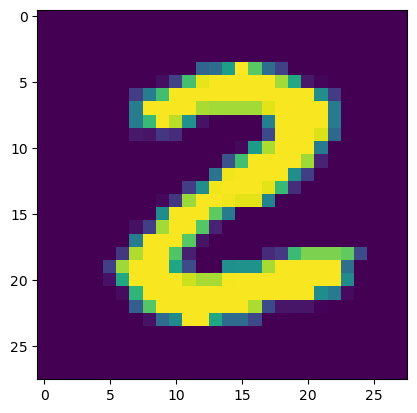

2


In [12]:
# displaying the image
plt.imshow(X_train[25])
plt.show()
# print the corresponding label
print(Y_train[25])

### __Image labels__

In [13]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [14]:
# unique values in Y_train
print(np.unique(Y_train))
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### In this case we can use these labels as such or we can also apply One Hot Enconding

### Consider the next: __*All the images have the same dimensions in this dataset. If they aren't, we have to resize all the images to a common dimension*__

In [15]:
# scaling data
X_train = X_train/255
X_test = X_test/255

In [16]:
# printing the 10th image
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### __Building the Neural Network__

In [17]:
# setting up the layers of the Neural  Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [18]:
# compiling the Neural Network
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the Neural Network
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2977 - accuracy: 0.9137
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1341 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1021 - accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0833 - accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0698 - accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0510 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0468 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0404 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.033

### __Accuracy on Test Data__

In [20]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1054 - accuracy: 0.9715
0.9714999794960022


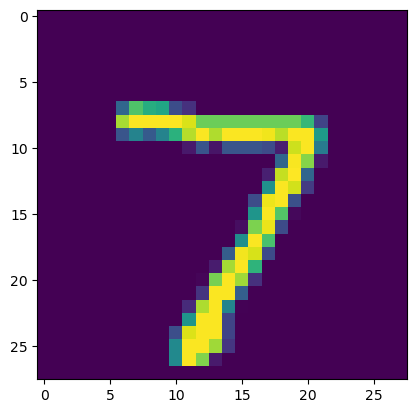

In [21]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 955us/step


In [24]:
# converting the prediction probabilities to class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [25]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 5, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

### __Confusion Matrix__

In [26]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

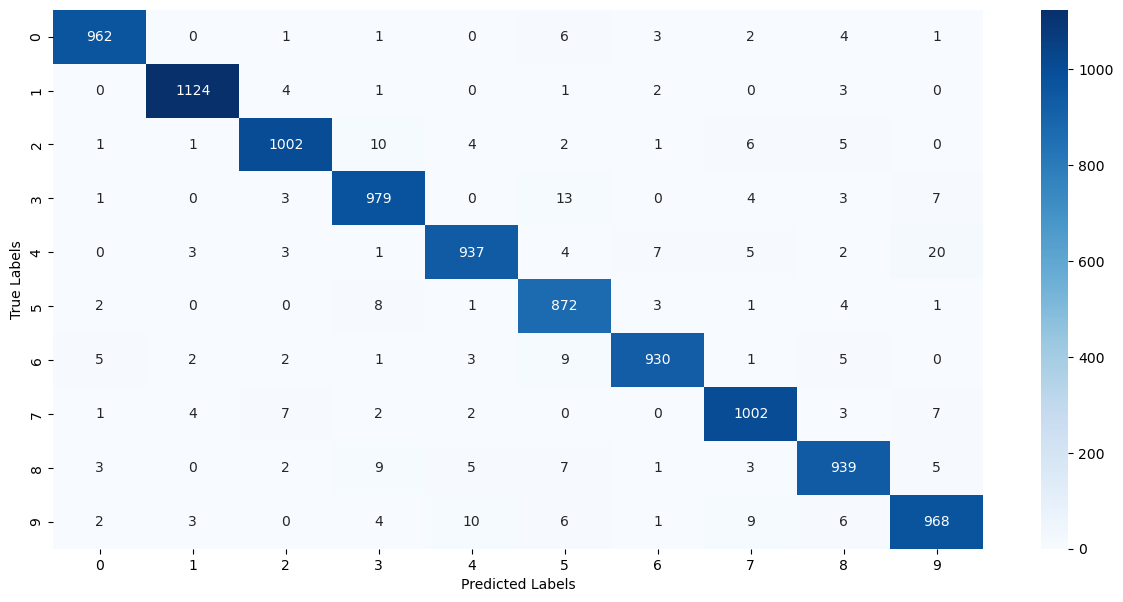

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [28]:
input_image_path = '3.png'
input_image = cv2.imread(input_image_path)

In [30]:
cv2.imshow(input_image)

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)
>  - imshow() missing required argument 'mat' (pos 2)


In [31]:
input_image.shape

(318, 318, 3)

In [32]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [33]:
grayscale.shape

(318, 318)

In [34]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [1]:
cv2.imshow('image',input_image_resize)

NameError: name 'cv2' is not defined

In [36]:
input_image_resize = input_image_resize/255

In [37]:
type(input_image_resize)

numpy.ndarray

In [38]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [39]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 31ms/step
[[8.4715100e-12 6.6346752e-07 1.3242409e-05 1.0000000e+00 4.9724053e-17
  6.8208313e-01 1.5775575e-14 2.0603632e-07 3.5369776e-02 9.5426135e-02]]


In [40]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


### __Aplication system__

In [43]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2.imshow('image',input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted:  3.png


1/1 [==============================] - 0s 24ms/step
The Handwritten Digit is recognised as  3
